<div style="text-align:center">
    <h1>
        Q-Learning
    </h1>
</div>

<br><br>

<div style="text-align:center">
    In this notebook we are going to implement a method that learns from experience and uses bootstrapping.
    It is known as Q-Learning.
</div>

<br>

<div style="text-align:center">
    This method follows an off-policy strategy, in which we'll use an exploratory policy $b(s)$ to interact with the environment and a target policy $\pi(s)$ that will participate in the learning process.
</div>


<br>

## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Create the environment, value table and policy

#### Create the environment

In [2]:
env = Maze()

#### Create the $Q(s, a)$ table

In [3]:
action_values = np.zeros((5, 5, 4))

#### Create the target policy $\pi(s)$

In [4]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

#### Create the exploratory policy $b(s)$

In [5]:
def exploratory_policy(state):
    return np.random.randint(4)

#### Plot the value table $Q(s,a)$

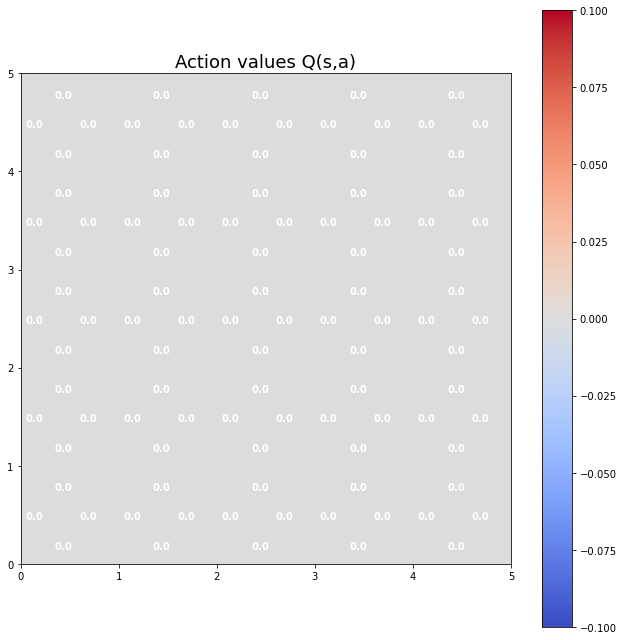

In [6]:
plot_action_values(action_values)

#### Plot the policy

2022-08-25 07:23:34.038 python[1357:35531] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fc29efcb000>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-25 07:23:34.039 python[1357:35531] Warning: Expected min height of view: (<NSButton: 0x7fc29eef6d70>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-25 07:23:34.041 python[1357:35531] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fc29eef74d0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-25 07:23:34.042 python[1357:35531] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fc29efbcd70>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


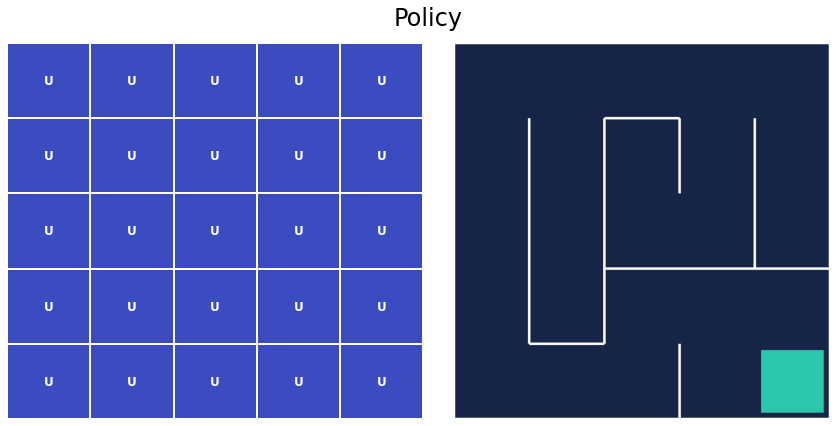

In [7]:
plot_policy(action_values, env.render(mode='rgb_array'))

## Implement the algorithm

</br>


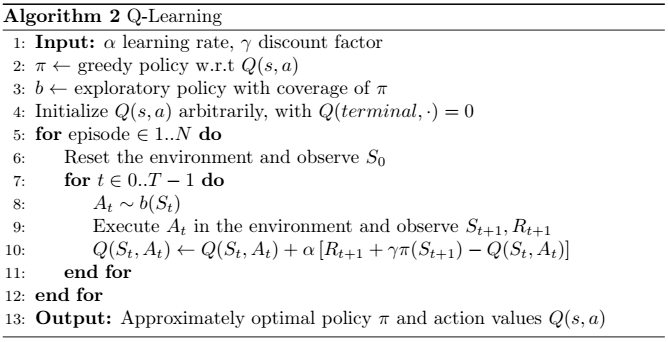

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [8]:
def q_learning(action_values, exploratory_policy, target_policy, episodes, alpha=0.1, gamma=0.99):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        done = False
        
        while not done:
            action = exploratory_policy(state)
            next_state, reward, done, _ = env.step(action)
            next_action = target_policy(next_state)
            
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
    
            state = next_state

In [9]:
q_learning(action_values, exploratory_policy, target_policy, 1000)

## Show results

#### Show resulting value table $Q(s,a)$

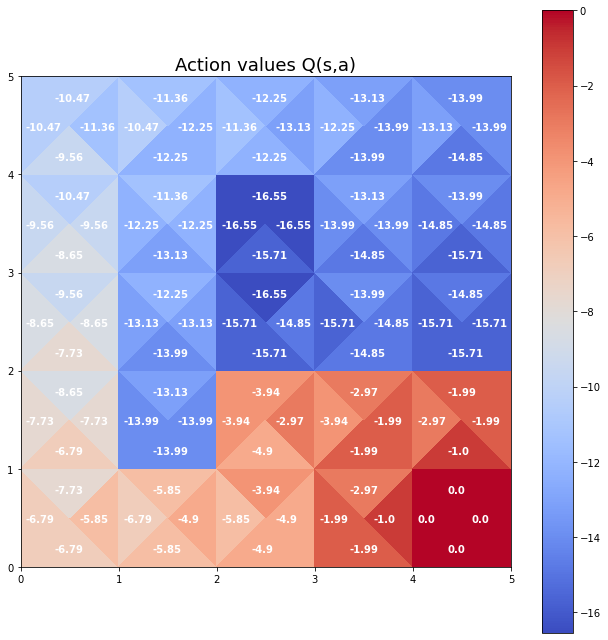

In [10]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

2022-08-25 07:23:45.739 python[1357:35531] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (7.00 secs).


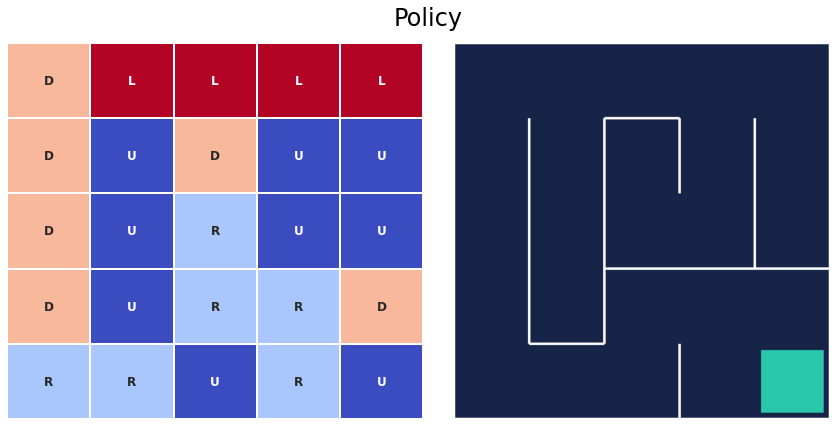

In [11]:
plot_policy(action_values, env.render(mode='rgb_array'))

#### Test the resulting agent

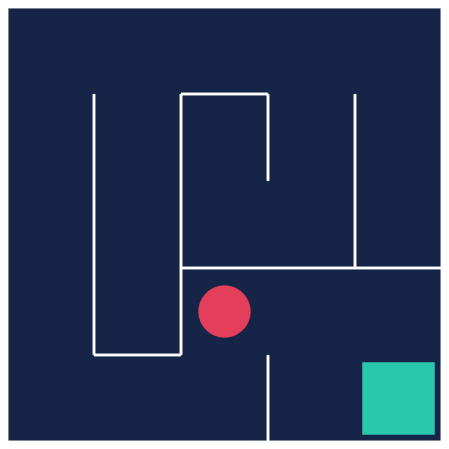

In [ ]:
test_agent(env, target_policy)